In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
parkinson_df= pd.read_csv(r"C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 24 - Parkinson's Disease Detection\Parkinsson disease.csv")
df = parkinson_df

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.corr(numeric_only=True)['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

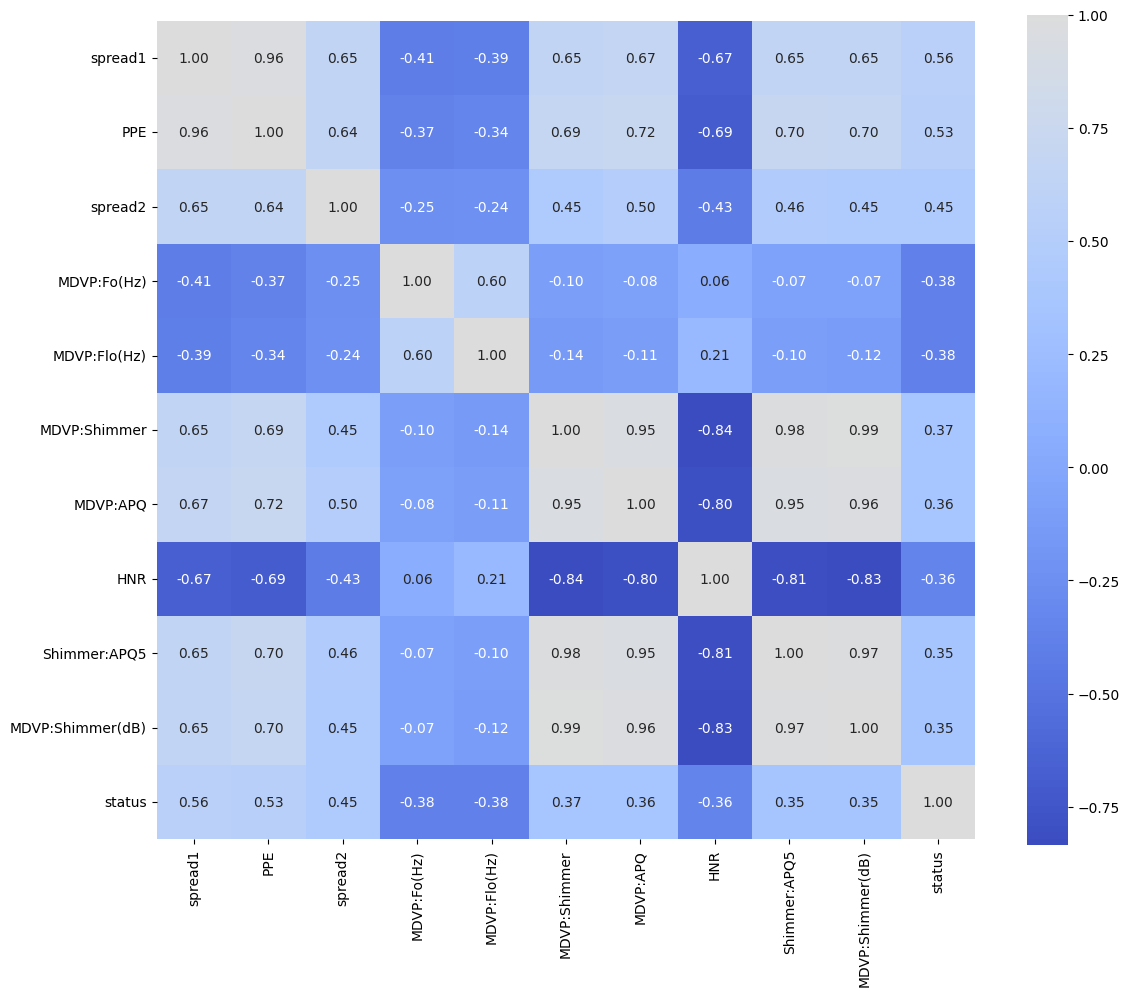

In [7]:
top_features = abs(df.corr(numeric_only= True)['status']).sort_values(ascending= False)[1:11].index
top_features = list(top_features) + ['status']

plt.figure(figsize =(12, 10))
sns.heatmap(df[top_features].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', center = True, square= True)
plt.tight_layout()
plt.show()

# moderate correlations for all variables in status
# high correlation of spread1 and ppe, will retain spread as it has high correlation with status
# extremely high correlation of Shimmer to MDVP: ADQ, Shimmer APQ5, MDVP Shimmer db5, will retain MDVP Shimmer since it has the highest correlation with status

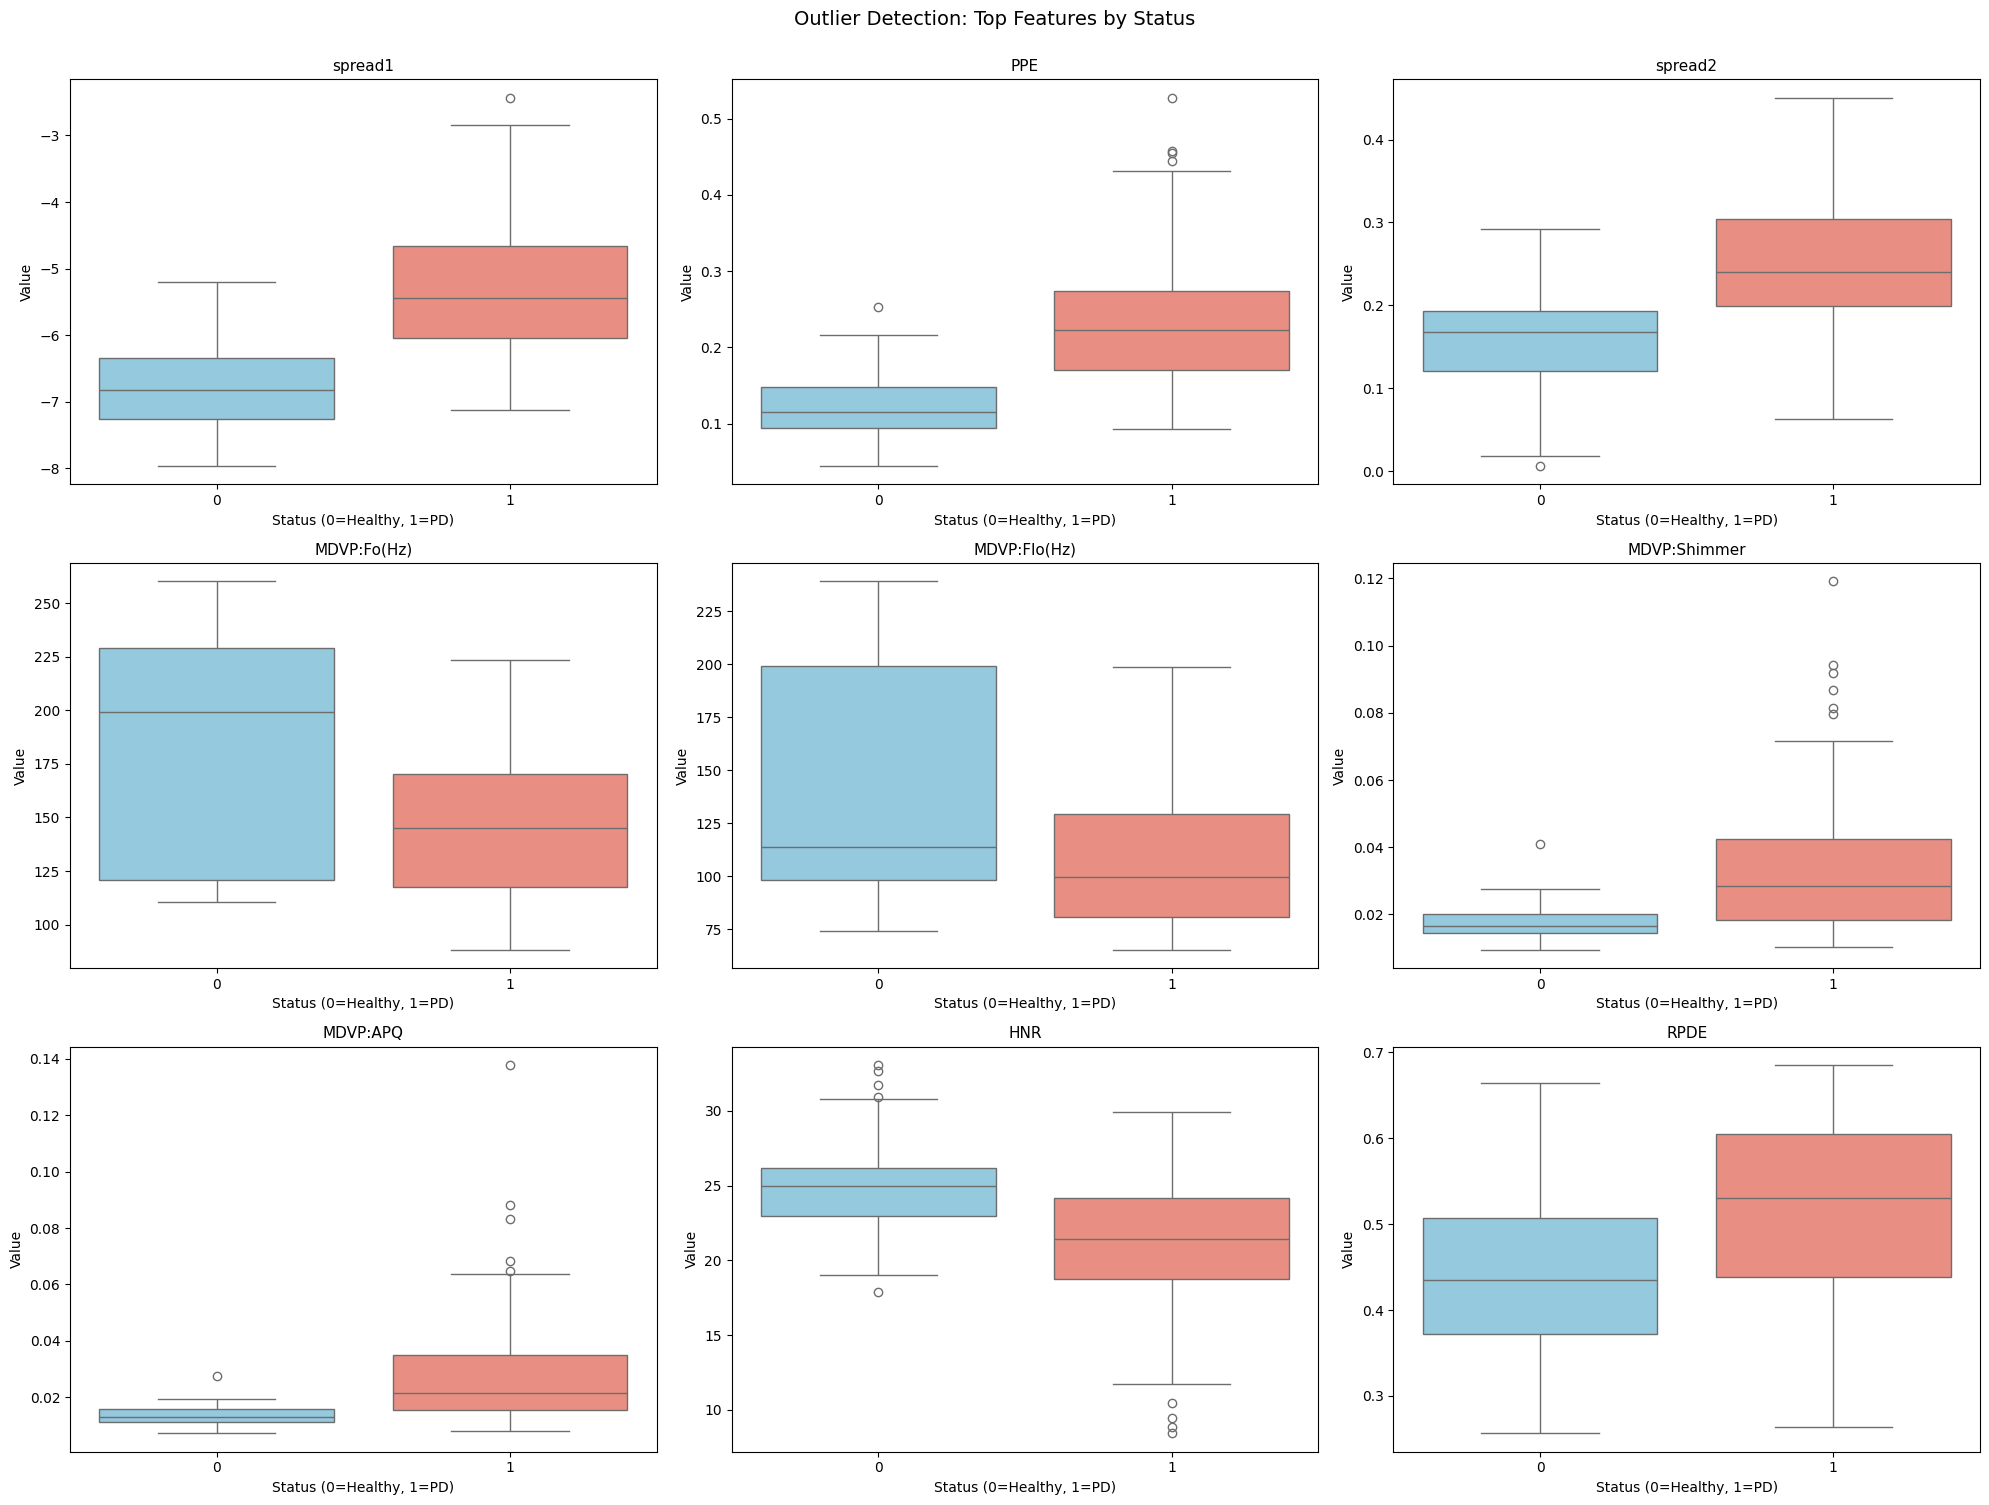

In [8]:
features_t = ['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)',  'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'RPDE']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, feature in enumerate(features_t):
    sns.boxplot(data=df, x='status', y=feature, hue='status' ,ax=axes[idx], 
                palette=['skyblue', 'salmon'], legend=False)
    axes[idx].set_title(f'{feature}', fontsize=11)
    axes[idx].set_xlabel('Status (0=Healthy, 1=PD)')
    axes[idx].set_ylabel('Value')

plt.suptitle('Outlier Detection: Top Features by Status', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

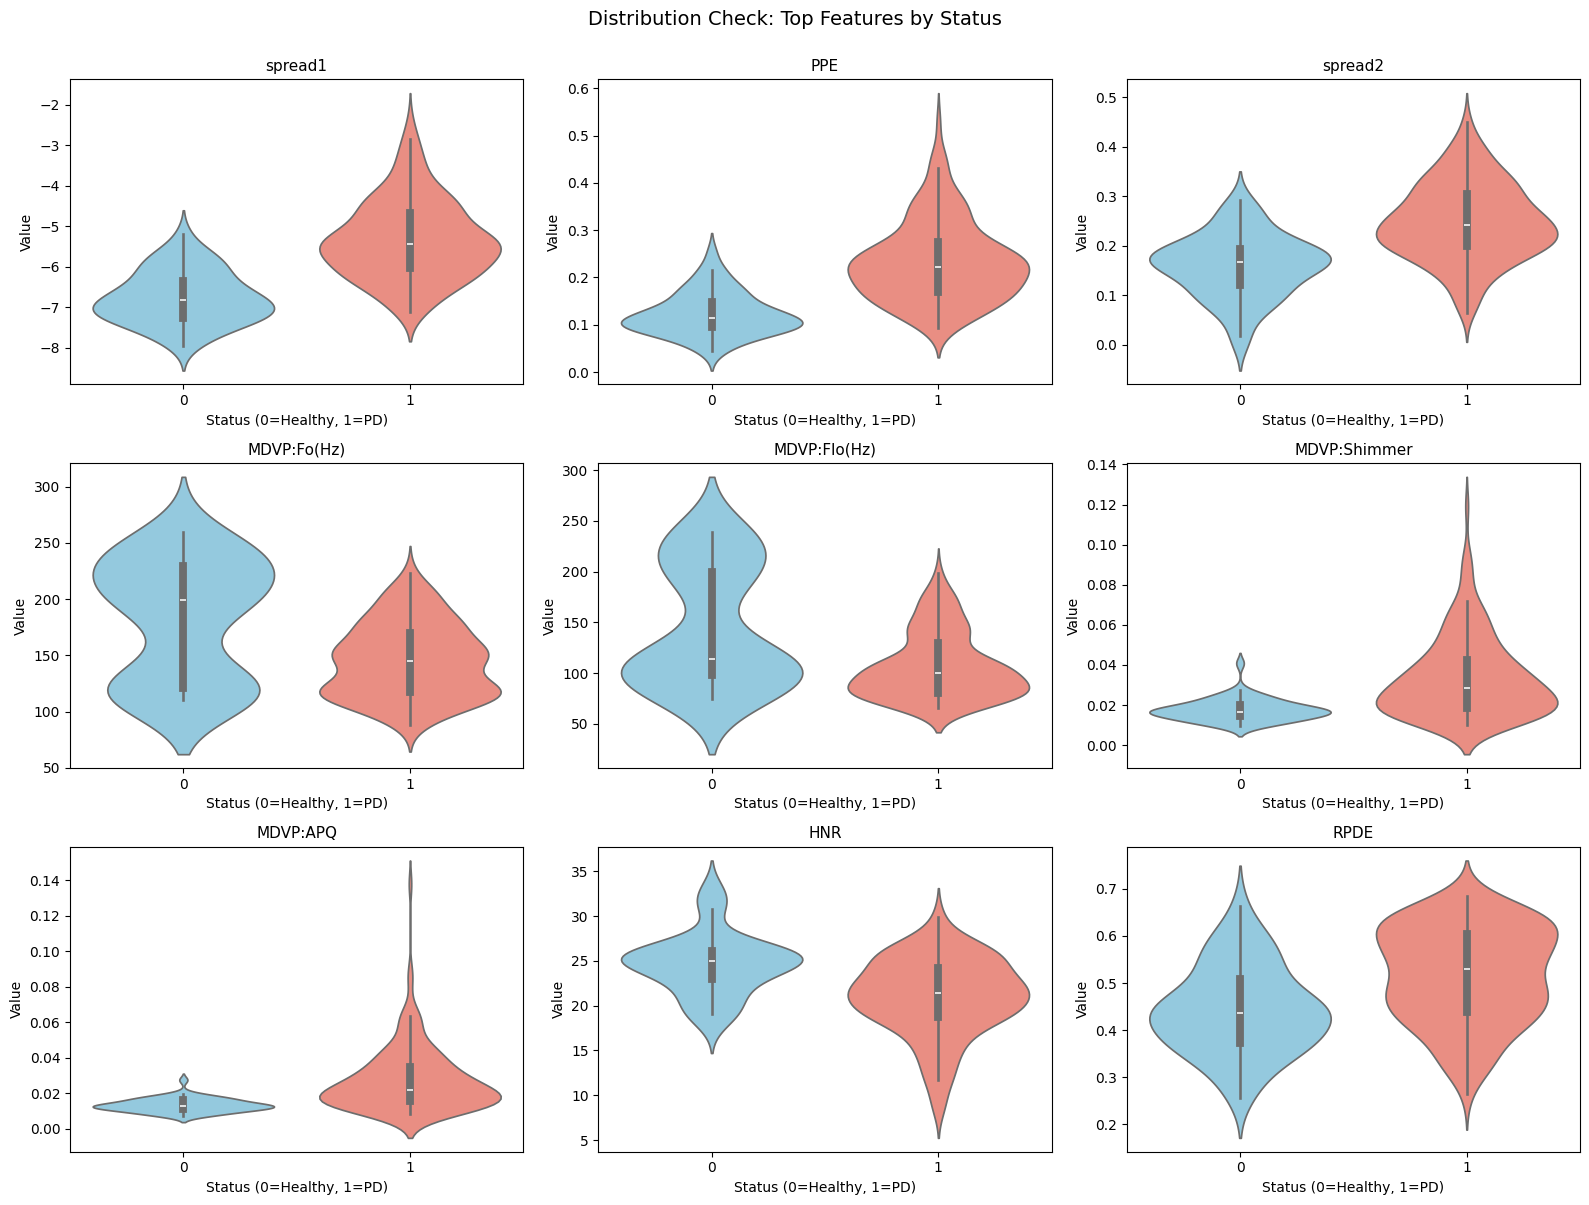

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(features_t):
    sns.violinplot(data=df, x='status', y=feature, hue = 'status', ax=axes[idx],
                   palette=['skyblue', 'salmon'], legend=False)
    axes[idx].set_title(f'{feature}', fontsize=11)
    axes[idx].set_xlabel('Status (0=Healthy, 1=PD)')
    axes[idx].set_ylabel('Value')

plt.suptitle('Distribution Check: Top Features by Status', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

In [10]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [11]:
X = df.drop(columns= ['spread1', 'MDVP:Shimmer','status','name'])
y = df['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2, stratify= y)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
models = {
    'LogisticRegression':{
        'model': LogisticRegression(random_state =2),
        'params':{
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'class_weight': ['balanced']

        }
    },
    'SVC':{
        'model': SVC(random_state= 2),
        'params':{
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state= 2),
        'params':{
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf':[1, 2, 4],
            'max_features': ['sqrt', None],
            'n_estimators': [100, 200],
            'class_weight': ['balanced']
        }
    },
    'XGBoost':{
        'model': XGBClassifier(random_state = 2),
        'params':{
            'max_depth':[2, 3],
            'learning_rate':[0.01, 0.05],
            'min_child_weight': [5, 10],
            'subsample': [0.6, 0.7],
            'colsample_bytree': [0.6, 0.7],
            'n_estimators': [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1, 2]
        }
    }
}

In [18]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'f1',
        n_jobs = -1,
        verbose = 1
    )

    grid_search.fit(X_train_scaled, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train_scaled)
    test_pred = grid_search.best_estimator_.predict(X_test_scaled)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1': f1_score(y_train, train_pred),
        'Test F1': f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred)
    }

best_model_name = max(results.keys(), key = lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best_model']

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [21]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Overfit Gap': result['Train F1'] - result['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall']
    })


summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test F1', ascending= False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Train F1,Test F1,Overfit Gap,Precision,Recall
2,Random Forest,1.0000,0.9831,0.0169,0.9667,1.0000
1,SVC,0.9828,0.9474,0.0354,0.9643,0.9310
3,XGBoost,0.9461,0.9153,0.0308,0.9000,0.9310
0,LogisticRegression,0.8879,0.8627,0.0251,1.0000,0.7586


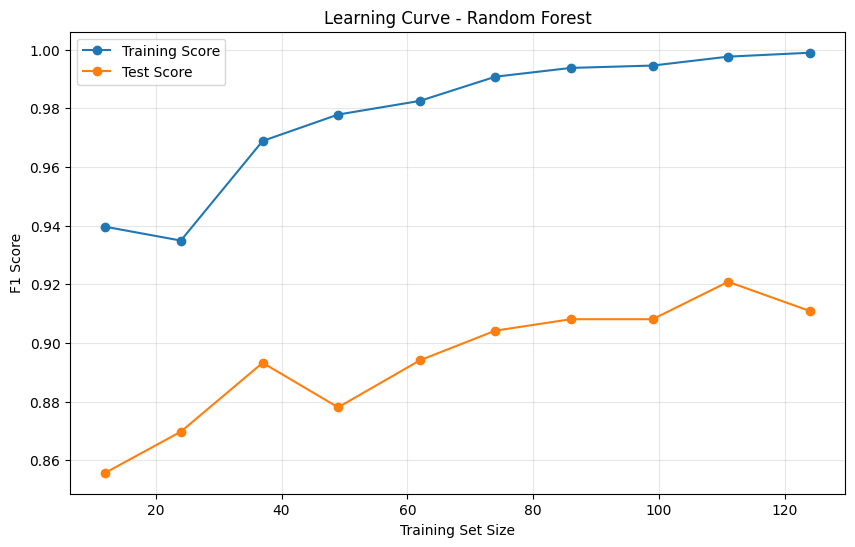

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
    results['Random Forest']['best_model'],
    X_train_scaled, y_train,
    cv=5,
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

# Check if performance is stable across folds
cv_scores = cross_val_score(
    results['Random Forest']['best_model'],
    X_train_scaled, y_train,
    cv=5,
    scoring='f1'
)

print(f"CV F1 Scores: {cv_scores}")
print(f"Mean: {cv_scores.mean():.3f}")
print(f"Std: {cv_scores.std():.3f}")

# Low std = stable, high std = inconsistent

CV F1 Scores: [0.91666667 0.92       0.95652174 0.875      0.95833333]
Mean: 0.925
Std: 0.031
